# Calculating the ROC Curve and AUC Score

The ROC curve and AUC score is an effective way to easily evaluate the performance of a binary classifier. In this activity, we will plot the ROC curve and calculate the AUC score of a model. We will use the same dataset and train the same model that we used in *Exercise 6.03, Deriving and Computing Metrics Based on a Confusion Matrix*. Use the APS failure data and calculate the ROC curve and AUC score. Follow these steps to complete this activity:

### 1. Import all the necessary dependencies and load the dataset.

In [2]:
import numpy as np 
import pandas as pd 
from tensorflow import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [3]:
# Load the Data
X = pd.read_csv("../data/aps_failure_training_feats.csv")
y = pd.read_csv("../data/aps_failure_training_target.csv")

### 2. Split the data into training and test datasets using the train_test_split function.

In [4]:
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=SEED)

### 3. Scale the training and test data using the StandardScaler function.

In [5]:
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)

X_test = pd.DataFrame(sc.transform(X_test), columns=X_train.columns)

### 4. Import the libraries that are required to build a neural network architecture and initiate the Sequential class. Add five Dense layers with Dropout. Set the first hidden layer so that it has a size of 64 with a dropout rate of 0.5, the second hidden layer so that it has a size of 32 with a dropout rate of 0.4, the third hidden layer so that it has a size of 16 with a dropout rate of 0.3, the fourth hidden layer so that it has a size of 8 with a dropout rate of 0.2, and the final hidden layer so that it has a size of 4, with a dropout rate of 0.1. Set all the activation functions to ReLU.

### 5. Add an output Dense layer with the sigmoid activation function. Compile the network then fit the model using accuracy. Fit the model with 100 epochs and a batch size of 20.

### 6. Fit the model to the training data, saving the results from the fit process.

In [7]:
np.random.seed(SEED)
random.set_seed(SEED)

model = Sequential()

model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',])

In [8]:
history = model.fit(
    X_train, 
    y_train, 
    batch_size=20, 
    epochs=100, 
    verbose=1, 
    validation_split=0.2,
    shuffle=False
)

Train on 9600 samples, validate on 2400 samples
Epoch 1/100
9600/9600 [==============================] - 2s 242us/step - loss: 0.1950 - accuracy: 0.9573 - val_loss: 0.0458 - val_accuracy: 0.9829
Epoch 2/100
9600/9600 [==============================] - 2s 192us/step - loss: 0.0702 - accuracy: 0.9828 - val_loss: 0.0507 - val_accuracy: 0.9829
Epoch 3/100
9600/9600 [==============================] - 2s 176us/step - loss: 0.0491 - accuracy: 0.9830 - val_loss: 0.0519 - val_accuracy: 0.9829
Epoch 4/100
9600/9600 [==============================] - 2s 180us/step - loss: 0.0488 - accuracy: 0.9834 - val_loss: 0.0523 - val_accuracy: 0.9833
Epoch 5/100
9600/9600 [==============================] - 2s 210us/step - loss: 0.0466 - accuracy: 0.9834 - val_loss: 0.0498 - val_accuracy: 0.9829
Epoch 6/100
9600/9600 [==============================] - 2s 212us/step - loss: 0.0350 - accuracy: 0.9850 - val_loss: 0.0637 - val_accuracy: 0.9871
Epoch 7/100
9600/9600 [==============================] - 2s 206us/step

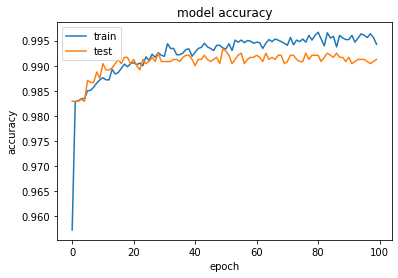

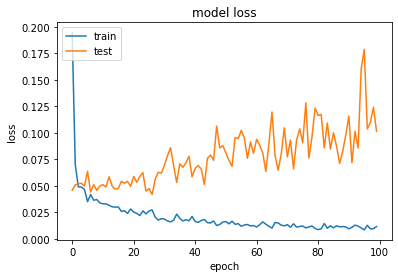

In [11]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 7. Create a variable representing the predicted classes of the test dataset.

In [9]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

### 8. Calculate the false positive rate and true positive rate using the roc_curve function from sklearn.metrics. The false positive rate and true positive rate are the first and second of three return variables. Pass the true values and the predicted values to the function.

### 9. Plot the ROC curve, which is the true positive rate as a function of the false positive rate.

In [36]:
confusion_matrix(y_test.values, y_pred>0.5)

array([[47054,   150],
       [  284,   512]], dtype=int64)

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

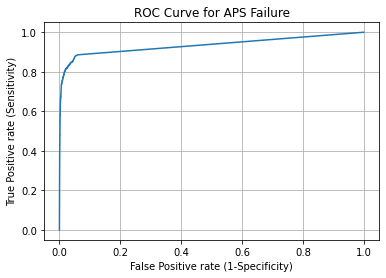

In [42]:
plt.plot(fpr,tpr)
plt.title("ROC Curve for APS Failure")
plt.xlabel("False Positive rate (1-Specificity)")
plt.ylabel("True Positive rate (Sensitivity)")
plt.grid(True)
plt.show()

### 10. Calculate the AUC score using the roc_auc_score from sklearn.metrics while passing the true values and predicted values of the model.

In [43]:
auc = roc_auc_score(y_test, y_pred_prob)
auc

0.9345208959380411